<a href="https://colab.research.google.com/github/sevenZHQ1018/Lab1/blob/main/zhq_hello%20panda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Manual Dictionary Construction
# Data Source: Table 1.4(Jan 2015)
# INSTRUCTION: Complete the lists inside the brackets below.
# Ensure strings have quotes '' and numbers do not.

data ={
    'Country':['United State', 'Argentina', 'Australia', 'Brazil', 'Britain',
               'China', 'Egypt', 'Euro area', 'Hong Kong', 'Indonesia',
               'Japan', 'Mexico', 'Norway', 'Pakistan', 'Philippines', 'Russia',
               'Saudi Arabia', 'South Africa', 'South Korea'],
    'iso_a3':['USA', 'ARG', 'AUS', 'BRA', 'GBR', 'CHN', 'EGY', 'EUZ', 'HKG',
              'IDN', 'JPN', 'MEX', 'NOR', 'PAK', 'PHL', 'RUS', 'SAU', 'ZAF',
              'KOR'],
    'local_price':[4.79, 28.00, 5.30, 13.50, 2.89, 17.20, 16.93, 3.68, 18.80,
                   27939, 370, 49.00, 48.00, 300, 163, 89.00, 11.00, 25.50,
                   4100],
    'dollar_ex':[1.00, 8.62, 1.23, 2.59, 0.66, 6.21, 7.36, 0.86, 7.74, 12472,
                 117.83, 14.63, 7.62, 100.67, 44.41, 65.44, 3.75, 11.49, 1084.66]

}
# Convert to DatFrame
df = pd.DataFrame(data)
print(df)

         Country iso_a3  local_price  dollar_ex
0   United State    USA         4.79       1.00
1      Argentina    ARG        28.00       8.62
2      Australia    AUS         5.30       1.23
3         Brazil    BRA        13.50       2.59
4        Britain    GBR         2.89       0.66
5          China    CHN        17.20       6.21
6          Egypt    EGY        16.93       7.36
7      Euro area    EUZ         3.68       0.86
8      Hong Kong    HKG        18.80       7.74
9      Indonesia    IDN     27939.00   12472.00
10         Japan    JPN       370.00     117.83
11        Mexico    MEX        49.00      14.63
12        Norway    NOR        48.00       7.62
13      Pakistan    PAK       300.00     100.67
14   Philippines    PHL       163.00      44.41
15        Russia    RUS        89.00      65.44
16  Saudi Arabia    SAU        11.00       3.75
17  South Africa    ZAF        25.50      11.49
18   South Korea    KOR      4100.00    1084.66


In [9]:
# 1. Calculate the price in USD
# Logic: Local Price / Exchange Rate
df['dollar_price'] = df ['local_price'] / df['dollar_ex']

# 2. Identify the US Price (The Benchmark)
us_price = df.loc[df['iso_a3'] == 'USA', 'dollar_price'].values

# 3. Calculate Implied PPP
# Logic: The exchange rate that WOULD equalise prices
df['implied_ppp'] = df['local_price'] / us_price

# 4. Calculate Valuation (Undervalued / Overvalued)
# Logic:(Implied - Actual) / Actual
df['valuation'] = (df['implied_ppp'] - df['dollar_ex']) / df['dollar_ex']

# 5. Convert to Percentage for readability
df['valuation_pct'] = df['valuation'] * 100

# Display results sorted by valuation
print(df[['Country', 'dollar_price', 'valuation_pct']].sort_values('valuation_pct'))

         Country  dollar_price  valuation_pct
15        Russia      1.360024     -71.607005
17  South Africa      2.219321     -53.667617
9      Indonesia      2.240138     -53.233029
6          Egypt      2.300272     -51.977625
8      Hong Kong      2.428941     -49.291429
5          China      2.769726     -42.176905
16  Saudi Arabia      2.933333     -38.761308
13      Pakistan      2.980034     -37.786351
10         Japan      3.140117     -34.444319
1      Argentina      3.248260     -32.186642
11        Mexico      3.349282     -30.077614
14   Philippines      3.670345     -23.374854
18   South Korea      3.779986     -21.085880
7      Euro area      4.279070     -10.666602
2      Australia      4.308943     -10.042942
4        Britain      4.378788      -8.584804
0   United State      4.790000       0.000000
3         Brazil      5.212355       8.817437
12        Norway      6.299213      31.507570


/tmp/ipython-input-2349285516.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='valuation_pct', y='Country', data=df.sort_values('valuation_pct'),palette="vlag")


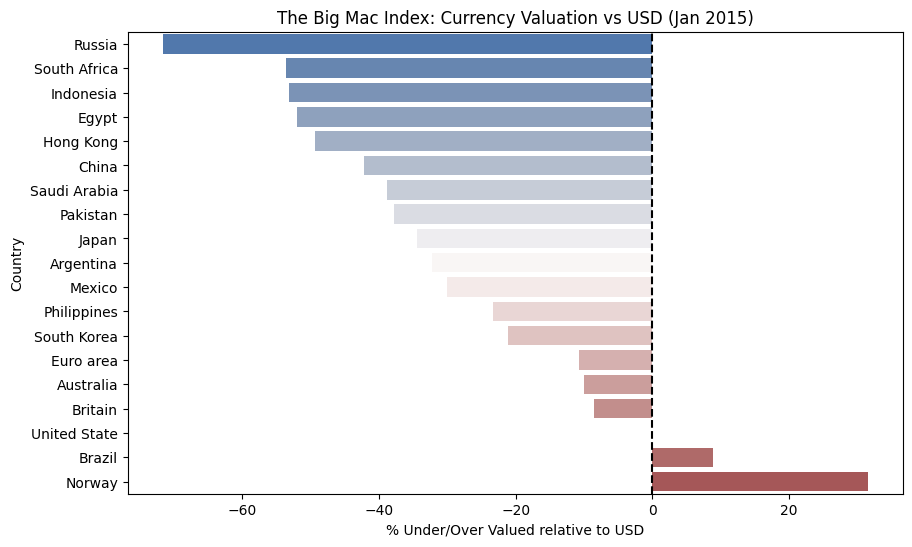

In [10]:
plt.figure(figsize=(10, 6))
# Create a bar plot
sns.barplot(x='valuation_pct', y='Country', data=df.sort_values('valuation_pct'),palette="vlag")

# Add a vertical line at 0 (Fair Value)
plt.axvline(x=0, color='black', linestyle= '--')

plt.title('The Big Mac Index: Currency Valuation vs USD (Jan 2015)')
plt.xlabel('% Under/Over Valued relative to USD')
plt.show()

In [12]:
# Loading the full dataset from GitHub
# Note: We must use the "Raw" URL, not the "Blob" URL from the browser bar.
url = "https://raw.githubusercontent.com/TheEconomist/big-mac-data/master/output-data/big-mac-full-index.csv"

full_df = pd.read_csv(url)

# Inspect the columns
print(full_df.columns)
print(full_df.head())

Index(['date', 'iso_a3', 'currency_code', 'name', 'local_price', 'dollar_ex',
       'dollar_price', 'USD_raw', 'EUR_raw', 'GBP_raw', 'JPY_raw', 'CNY_raw',
       'GDP_bigmac', 'adj_price', 'USD_adjusted', 'EUR_adjusted',
       'GBP_adjusted', 'JPY_adjusted', 'CNY_adjusted'],
      dtype='object')
         date iso_a3 currency_code         name  local_price  dollar_ex  \
0  2000-04-01    ARG           ARS    Argentina         2.50       1.00   
1  2000-04-01    AUS           AUD    Australia         2.59       1.68   
2  2000-04-01    BRA           BRL       Brazil         2.95       1.79   
3  2000-04-01    CAN           CAD       Canada         2.85       1.47   
4  2000-04-01    CHE           CHF  Switzerland         5.90       1.70   

   dollar_price  USD_raw  EUR_raw  GBP_raw  JPY_raw  CNY_raw    GDP_bigmac  \
0      2.500000  0.11607  0.05007 -0.16722 -0.09864  1.09091   8317.724800   
1      1.541667 -0.31176 -0.35246 -0.48645 -0.44416  0.28939  28023.744000   
2      1.648045